# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# Datasets

In [2]:
patient_data_path = 'data/patient.csv'
route_data_path = 'data/route.csv'
time_data_path = 'data/time.csv'

df_patient = pd.read_csv(patient_data_path)
df_route = pd.read_csv(route_data_path)
df_time = pd.read_csv(time_data_path)

## Patient

**Columns**

1. **id** the ID of the patient (n-th confirmed patient)
2. **sex** the sex of the patient
3. **birth_year** the birth year of the patient
4. **country** the country of the patient
5. **region** the region of the patient
6. **group** the collective infection
7. **infection_reason** the reason of infection
8. **infection_order** the order of infection
9. **infected_by** the ID of who has infected the patient
10. **contact_number** the number of contacts with people
11. **confirmed_date** the date of confirmation
12. **released_date** the date of discharge
13. **deceased_date** the date of decease
14. **state** isolated / released / deceased

In [3]:
df_patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [4]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3736 entries, 0 to 3735
Data columns (total 14 columns):
id                  3736 non-null int64
sex                 318 non-null object
birth_year          292 non-null float64
country             3736 non-null object
region              305 non-null object
group               76 non-null object
infection_reason    130 non-null object
infection_order     35 non-null float64
infected_by         62 non-null float64
contact_number      32 non-null float64
confirmed_date      3736 non-null object
released_date       28 non-null object
deceased_date       13 non-null object
state               3736 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 408.8+ KB


In [5]:
df_patient.isna().sum()

id                     0
sex                 3418
birth_year          3444
country                0
region              3431
group               3660
infection_reason    3606
infection_order     3701
infected_by         3674
contact_number      3704
confirmed_date         0
released_date       3708
deceased_date       3723
state                  0
dtype: int64

In [6]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val: val if val > 0 else np.nan)

### Sex

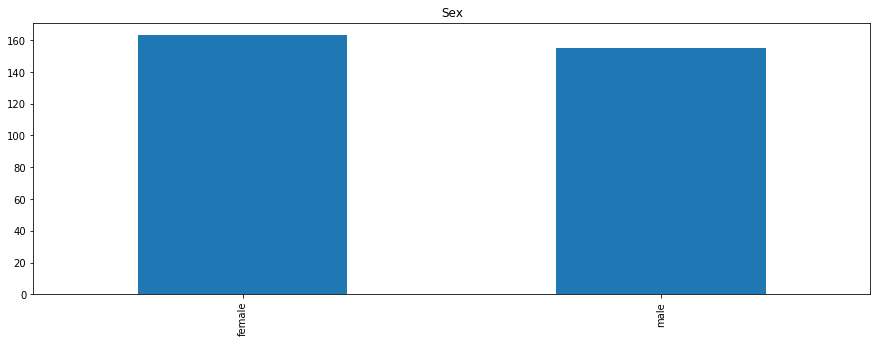

In [7]:
plt.figure(figsize=(15, 5))
plt.title('Sex')
df_patient.sex.value_counts().plot.bar();

### Birth year

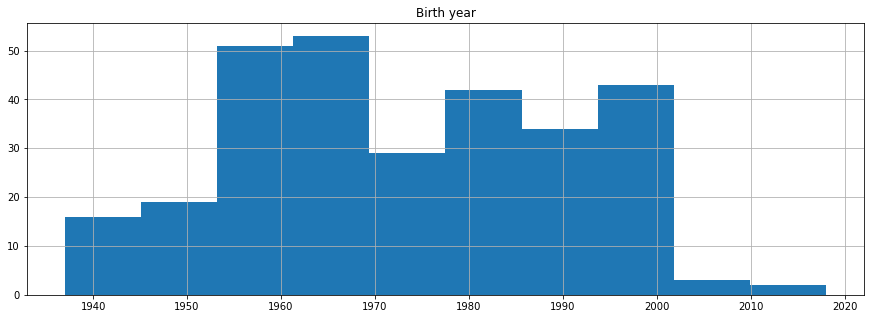

In [8]:
plt.figure(figsize=(15, 5))
plt.title('Birth year')
df_patient.birth_year.hist();

### Age

In [9]:
df_patient['age'] = datetime.now().year - df_patient.birth_year 

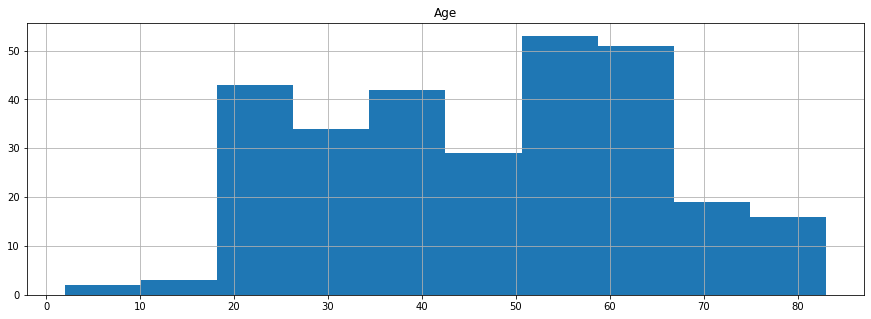

In [10]:
plt.figure(figsize=(15, 5))
plt.title('Age')
df_patient['age'].hist();

### Country

In [11]:
df_patient.country.value_counts()

Korea       3727
China          8
Mongolia       1
Name: country, dtype: int64

### Infection reason

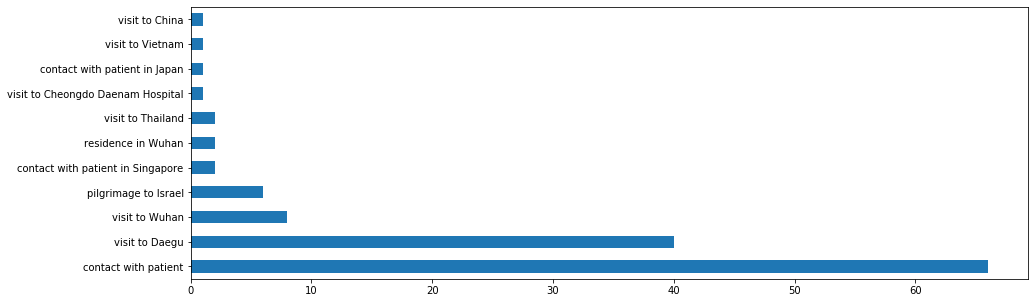

In [12]:
plt.figure(figsize=(15,5))
df_patient.infection_reason.value_counts().plot.barh();

### Region

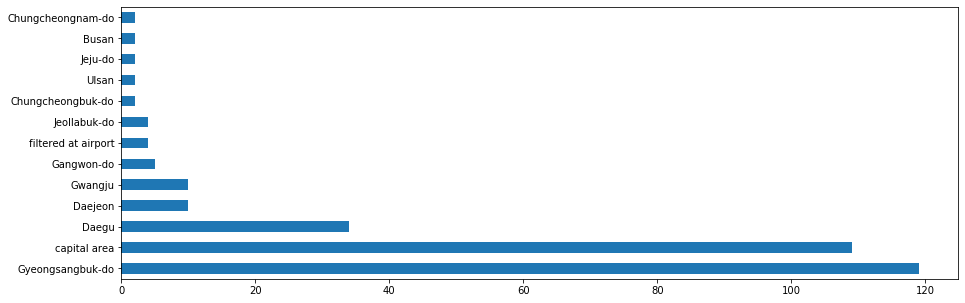

In [13]:
plt.figure(figsize=(15,5))
df_patient.region.value_counts().plot.barh();

### State

In [14]:
df_patient.state.value_counts()

isolated    3695
released      28
deceased      13
Name: state, dtype: int64

### State / Age

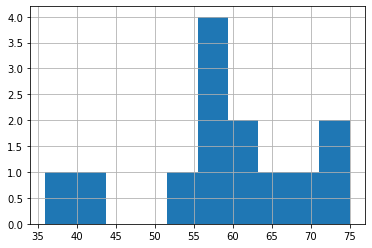

In [15]:
df_patient[df_patient.state == 'deceased']['age'].hist();

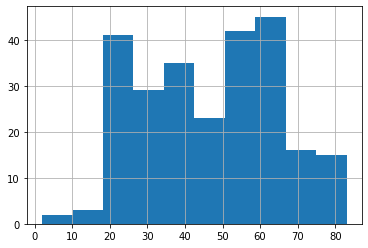

In [16]:
df_patient[df_patient.state == 'isolated']['age'].hist();

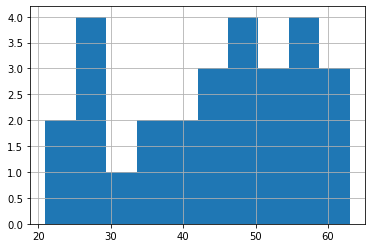

In [17]:
df_patient[df_patient.state == 'released']['age'].hist()

## Route

**Columns**


1. **id** the ID of the patient (n-th confirmed patient)
2. **date** Year-Month-Day
3. **province** Special City / Metropolitan City / Province(-do)
4. **city** City(-si) / Country (-gun) / District (-gu)
5. **visit** the type of place visited
6. **latitude** WGS84
7. **longitude** WGS84

In [18]:
df_route.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [19]:
df_route.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
id           68 non-null int64
date         68 non-null object
province     68 non-null object
city         68 non-null object
visit        68 non-null object
latitude     68 non-null float64
longitude    68 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.8+ KB


In [20]:
df_route.isna().sum()

id           0
date         0
province     0
city         0
visit        0
latitude     0
longitude    0
dtype: int64

### City

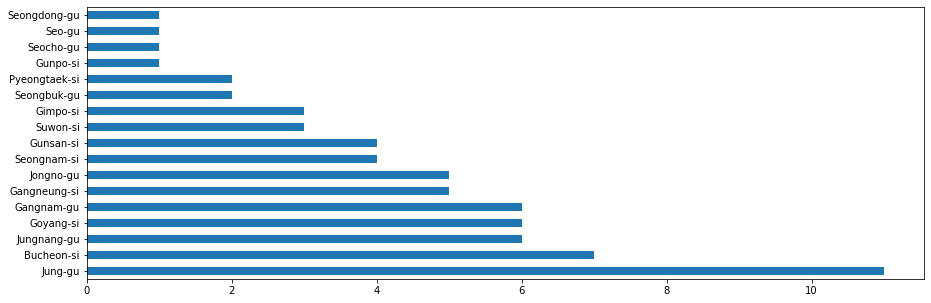

In [21]:
plt.figure(figsize=(15,5))
df_route.city.value_counts().plot.barh()

### Province

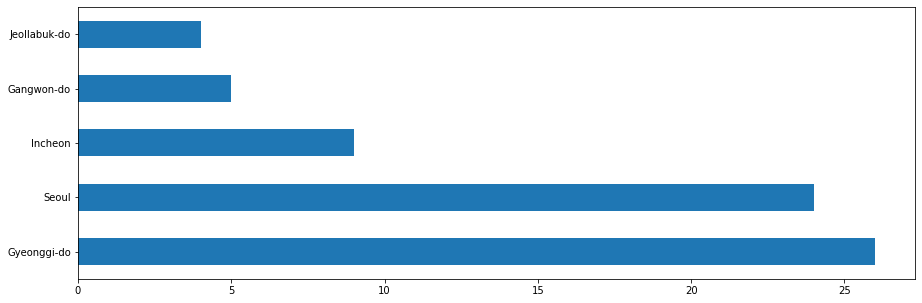

In [22]:
plt.figure(figsize=(15,5))
df_route.province.value_counts().plot.barh()

### Visit

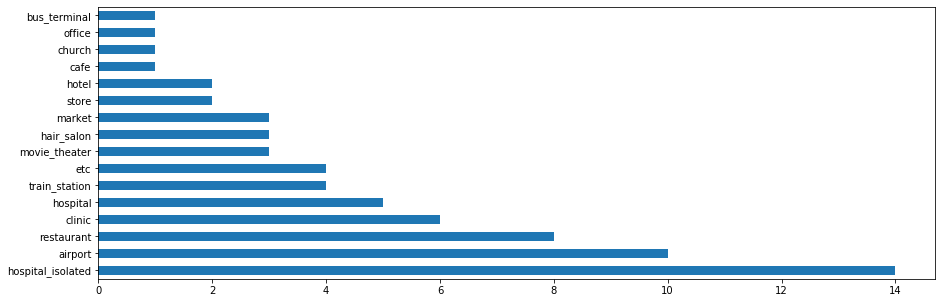

In [23]:
plt.figure(figsize=(15,5))
df_route.visit.value_counts().plot.barh()

### Latitude / Longitude

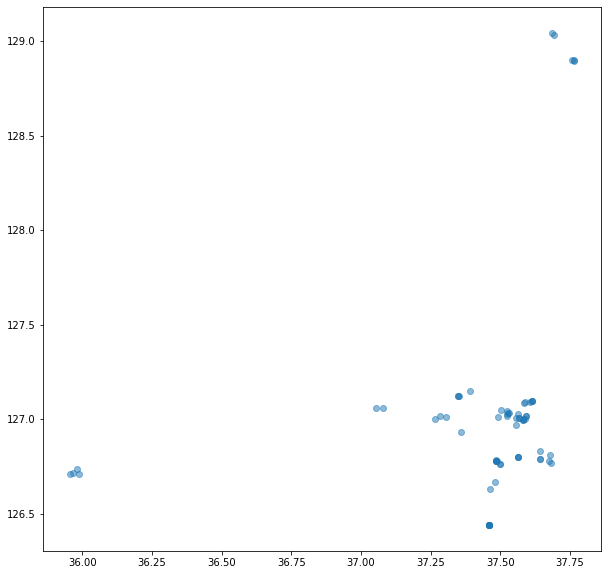

In [24]:
latitude = df_route.latitude
longitude = df_route.longitude
plt.figure(figsize=(10,10))
plt.scatter(latitude,longitude, alpha=.5)

## Time

**Columns**

1. **date** Year-Month-Day
2. **acc_test** the accumulated number of tests
3. **acc_negative** the accumulated number of negative results
4. **acc_confirmed** the accumulated number of positive results
5. **acc_released** the accumulated number of releases
6. **acc_deceased** the accumulated number of deceases
7. **new_test** the number of new tests
8. **new_negative** the number of new negative results
9. **new_confirmed** the number of new positive results
10. **new_released** the number of new releases
11. **new_deceased** the number of new deceases

In [25]:
df_time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [26]:
df_time.isna().sum()

date             0
acc_test         0
acc_negative     0
acc_confirmed    0
acc_released     0
acc_deceased     0
new_test         0
new_negative     0
new_confirmed    0
new_released     0
new_deceased     0
dtype: int64

In [27]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
date             42 non-null object
acc_test         42 non-null int64
acc_negative     42 non-null int64
acc_confirmed    42 non-null int64
acc_released     42 non-null int64
acc_deceased     42 non-null int64
new_test         42 non-null int64
new_negative     42 non-null int64
new_confirmed    42 non-null int64
new_released     42 non-null int64
new_deceased     42 non-null int64
dtypes: int64(10), object(1)
memory usage: 3.7+ KB


In [28]:
df_time.describe()

,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
count,42.000000,42.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,14946.261905,9815.02381,379.166667,8.285714,2.547619,2355.261905,1472.023810,88.952381,0.714286,0.428571
std,26148.130843,15739.31285,859.337774,9.929718,5.324597,4092.895225,2409.326113,191.410420,1.293242,1.015558
min,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,262.500000,210.50000,7.250000,0.000000,0.000000,59.000000,44.000000,0.000000,0.000000,0.000000
50%,2854.000000,2117.50000,27.000000,3.500000,0.000000,496.500000,401.000000,1.000000,0.000000,0.000000
75%,12694.750000,10921.75000,90.750000,16.000000,0.750000,1872.000000,1273.250000,44.750000,1.000000,0.000000
max,98921.000000,61825.00000,3736.000000,30.000000,18.000000,14515.000000,9275.000000,813.000000,6.000000,4.000000
